## Author - VEDANT MANU

## TASK 1 - Score prediction using Supervised ML


### The aim of this task is to predict the percentage of a student based on the number of study hours using a simple linear regression model. The library used is python's scikit learn.

In [77]:
#importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 


In [78]:
#loading data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
#checking for null values ( there aren't any )
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [79]:
#describing the data using the describe function
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


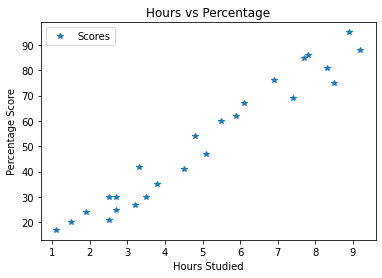

In [80]:
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### It is safe to assume that the following graph follows a linear pattern hence a linear machine learning model should be used

In [81]:
#preparing the data for linear model
X = data.iloc[:,0:1].values  #1st column of data is X
Y = data.iloc[:,1].values  #2nd column of data is 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Training the algorithm

In [83]:
# the next step is to train the algorithm using the training set which finds the best value of coefficient and intercept
model=LinearRegression()

#calling fit method which finds the best value for intercept and slope for best fit line
model.fit(X_train, Y_train) 
print(model.coef_[0],model.intercept_)
# the training is now complete

9.910656480642238 2.018160041434669


## Plotting the regression line.

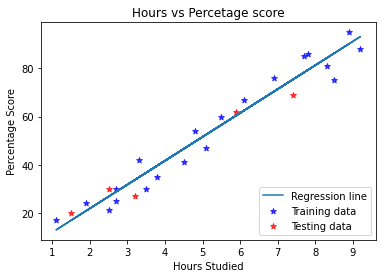

In [95]:
# we first write the equation of the line
m = model.coef_
b = model.intercept_
equation = m*X + b

# plot function
plt.scatter(X_train, Y_train,color="blue",label="Training data",marker = '*',alpha = 0.75)
plt.scatter(X_test,Y_test,color="red",label="Testing data",marker = '*',alpha = 0.75)
plt.plot(X,equation, label="Regression line")
plt.title('Hours vs Percetage score')
plt.legend(loc="lower right")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

## Predicting values and evaluating the model using the test data


In [90]:
#looking at the test data
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [96]:
# predicitng scores using the test data
Y_predicted = model.predict(X_test)

#comparing the predicitng scores with actual scores
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predicted})  
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


## Checking the efficiency and other metrics of the model 

In [102]:
from sklearn import metrics  
print("Residual standard error =", model.score(X_test,Y_test))


Residual standard error = 0.9454906892105355


In [98]:
hours=[[9.25]]
sol=model.predict(hours)

print("Percentage score for studying 9.25 hrs/day is ",sol[0])


Percentage score for studying 9.25 hrs/day is  93.69173248737538
